# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Set the units to use metric (for Celsius)
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=' + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | san pedro pochutla
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | crane
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | bodo
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | tazacorte
Processing Record 16 of Set 1 | kapuskasing
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | salinopolis
Processing Record 19 of Set 1 | jalai nur
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | thinadhoo
Processing Record 23 of Set 1 | 

Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | santa elena de uairen
Processing Record 39 of Set 4 | coppenbrugge
Processing Record 40 of Set 4 | mezgor'e
City not found. Skipping...
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | bontang
Processing Record 43 of Set 4 | benguela
Processing Record 44 of Set 4 | ta`u
Processing Record 45 of Set 4 | robore
Processing Record 46 of Set 4 | san luis de la loma
Processing Record 47 of Set 4 | port saint john's
Processing Record 48 of Set 4 | ban dung
Processing Record 49 of Set 4 | hadibu
Processing Record 0 of Set 5 | walvis bay
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | mountain home
Processing Record 3 of Set 5 | filey
Processing Record 4 of Set 5 | kupang
Processing Record 5 of Set 5 | zavoronezhskoye
Processing Record 6 of Set 5 | les anglais
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | maputo
Processing Record 9 of Set 5 | lyantor

Processing Record 26 of Set 8 | tuskegee
Processing Record 27 of Set 8 | muravlenko
Processing Record 28 of Set 8 | piton saint-leu
Processing Record 29 of Set 8 | yarmouth
Processing Record 30 of Set 8 | manay
Processing Record 31 of Set 8 | bratslav
Processing Record 32 of Set 8 | majenang
Processing Record 33 of Set 8 | saipan
Processing Record 34 of Set 8 | as suki
Processing Record 35 of Set 8 | san antonio de pale
Processing Record 36 of Set 8 | bonthe
Processing Record 37 of Set 8 | dordrecht
Processing Record 38 of Set 8 | kaura namoda
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | rapid city
Processing Record 41 of Set 8 | turpan
Processing Record 42 of Set 8 | tarrafal de sao nicolau
Processing Record 43 of Set 8 | beloyarskiy
Processing Record 44 of Set 8 | kenai
Processing Record 45 of Set 8 | konarka
Processing Record 46 of Set 8 | chamzinka
Processing Record 47 of Set 8 | yinchuan
Processing Record 48 of Set 8 | kaspiyskiy
Processing Record 49 of Set

Processing Record 16 of Set 12 | broome
Processing Record 17 of Set 12 | ayorou
Processing Record 18 of Set 12 | tympaki
Processing Record 19 of Set 12 | maragogi
Processing Record 20 of Set 12 | jackson
Processing Record 21 of Set 12 | solnechnyy
Processing Record 22 of Set 12 | queenstown
Processing Record 23 of Set 12 | marshfield
Processing Record 24 of Set 12 | tripoli
Processing Record 25 of Set 12 | nemuro
Processing Record 26 of Set 12 | likiep
Processing Record 27 of Set 12 | homer
Processing Record 28 of Set 12 | loango
Processing Record 29 of Set 12 | wainwright
Processing Record 30 of Set 12 | bel ombre
Processing Record 31 of Set 12 | aliwal north
Processing Record 32 of Set 12 | chalon-sur-saone
Processing Record 33 of Set 12 | qamdo
Processing Record 34 of Set 12 | maumere
Processing Record 35 of Set 12 | ventspils
Processing Record 36 of Set 12 | krasnyy luch
Processing Record 37 of Set 12 | pailon
Processing Record 38 of Set 12 | alotau
City not found. Skipping...
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,13.20,86,20,2.06,GB,1696265396
1,waingapu,-9.6567,120.2641,25.19,85,80,2.74,ID,1696265900
2,blackmans bay,-43.0167,147.3167,9.85,68,3,4.35,AU,1696265351
3,san pedro pochutla,15.7333,-96.4667,31.56,59,94,1.37,MX,1696265901
4,pisco,-13.7000,-76.2167,22.23,73,0,4.12,PE,1696265384


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv('output_data/cities.csv', index_label = 'City_ID')

In [7]:
# Read saved data
city_data_df = pd.read_csv('output_data/cities.csv', index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,13.20,86,20,2.06,GB,1696265396
1,waingapu,-9.6567,120.2641,25.19,85,80,2.74,ID,1696265900
2,blackmans bay,-43.0167,147.3167,9.85,68,3,4.35,AU,1696265351
3,san pedro pochutla,15.7333,-96.4667,31.56,59,94,1.37,MX,1696265901
4,pisco,-13.7000,-76.2167,22.23,73,0,4.12,PE,1696265384


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

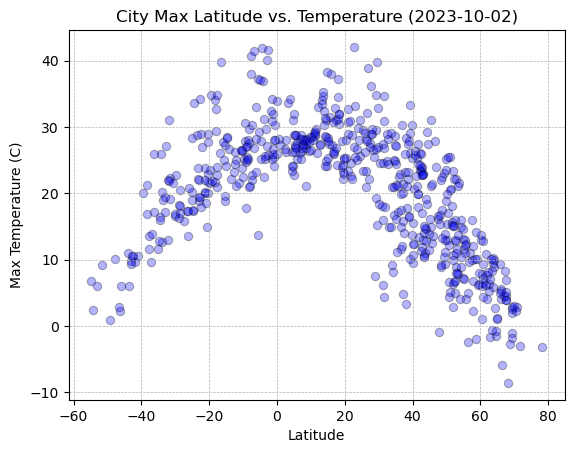

In [8]:
# Set the the date of pulling
dt = time.strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
city_latitude = city_data_df['Lat']
city_temperature = city_data_df['Max Temp']

plt.scatter(city_latitude, city_temperature, edgecolor = 'black', linewidth = 0.8, color = 'b', alpha = 0.3)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

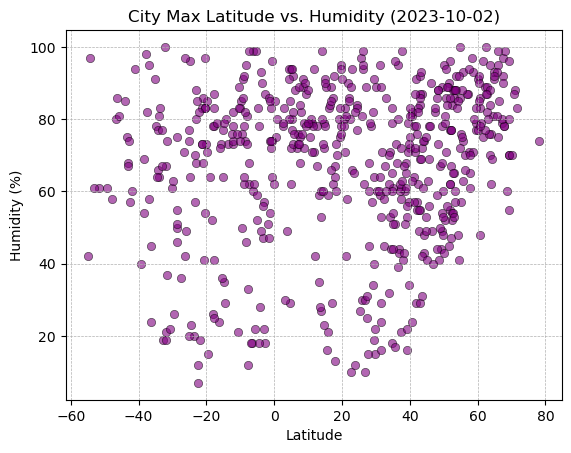

In [9]:
# Build the scatter plots for latitude vs. humidity
city_humidity = city_data_df['Humidity']

plt.scatter(city_latitude, city_humidity, edgecolor = 'black', linewidth = 0.5, color = 'purple', alpha = 0.6)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

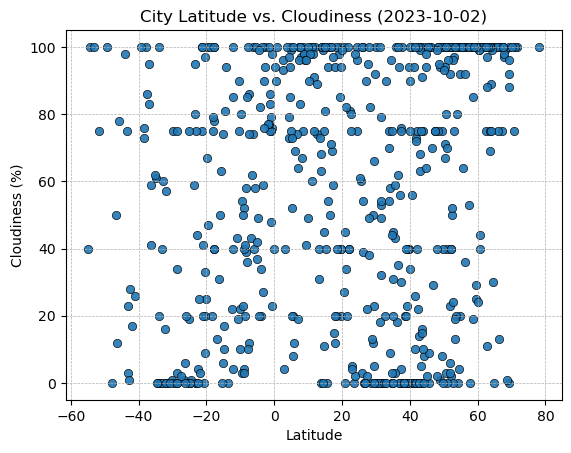

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_cloudiness = city_data_df['Cloudiness']

plt.scatter(city_latitude, city_cloudiness, edgecolor = 'black', linewidth = 0.5, alpha = 0.9)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

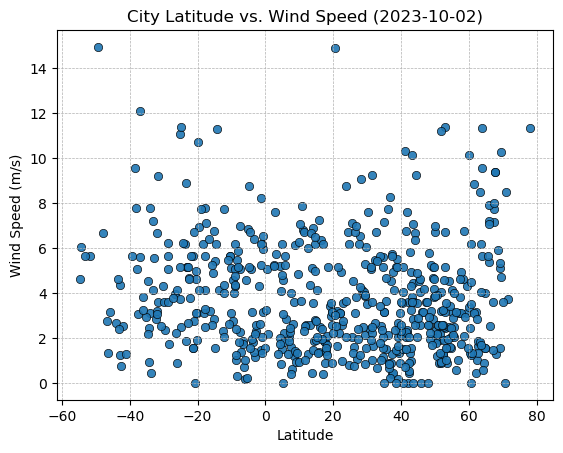

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_windspeed = city_data_df['Wind Speed']

plt.scatter(city_latitude, city_windspeed, edgecolor = 'black', linewidth = 0.5, alpha = 0.9)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_regression_line(x, y, xlabel, ylabel):
    
    # Calculate the correlation coefficient and linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Calulate the regression value
    regress_values = x * slope + intercept
    
    # Setup the line_eq for use as label
    line_eq = f'y =  {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Start the plotting of the chart
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-', linewidth = 0.5, label = line_eq)
    
    #plt.annotate(line_eq, (x_pos, y_pos), fontsize = 12, color = 'r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize = 10, loc = 'best')
    
    # Print the r-value
    print(f'The r-value is: {rvalue}')
    
    # Show the chart
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,13.20,86,20,2.06,GB,1696265396
3,san pedro pochutla,15.7333,-96.4667,31.56,59,94,1.37,MX,1696265901
6,crane,31.3974,-102.3501,27.47,53,53,9.24,US,1696265410
8,utrik,11.2278,169.8474,28.59,79,60,6.81,MH,1696265394
10,bodo,67.2800,14.4050,8.30,79,75,3.60,NO,1696265903


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waingapu,-9.6567,120.2641,25.19,85,80,2.74,ID,1696265900
2,blackmans bay,-43.0167,147.3167,9.85,68,3,4.35,AU,1696265351
4,pisco,-13.7000,-76.2167,22.23,73,0,4.12,PE,1696265384
5,adamstown,-25.0660,-130.1015,20.21,74,19,11.05,PN,1696265112
7,west island,-12.1568,96.8225,24.99,73,40,7.72,CC,1696265346


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7985740211423072


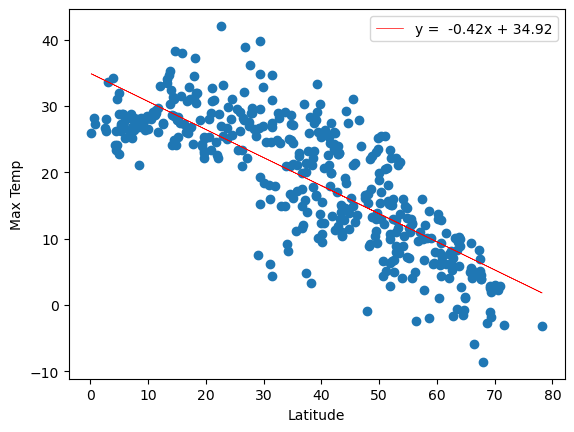

In [15]:
# Linear regression on Northern Hemisphere
northern_latitude = northern_hemi_df['Lat']
northern_temperature = northern_hemi_df['Max Temp']

plot_regression_line(northern_latitude, northern_temperature, 'Latitude', 'Max Temp')

The r-value is: 0.7620665851591176


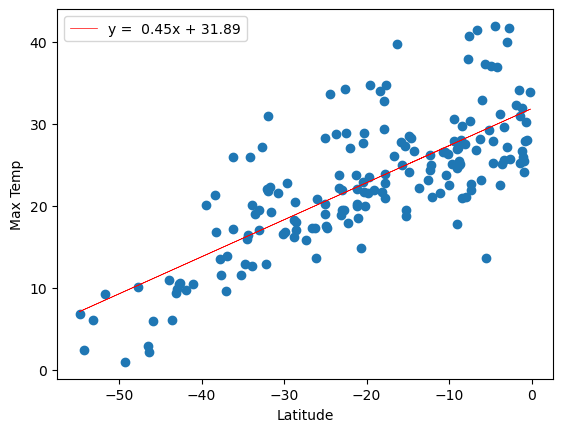

In [16]:
# Linear regression on Southern Hemisphere
southern_latitude = southern_hemi_df['Lat']
southern_temperature = southern_hemi_df['Max Temp']

plot_regression_line(southern_latitude, southern_temperature, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** When looking at the linear relation between the temperature and the latitude, both positive and negative linear regressions showed a decrease in temperature as the latitude is moving away from 0 (equator). Since the equator is the closest point to the sun, we would expect regions or cities that are closer to the equator to be warmer than anywhere else. This is further true when looking at the scatter plot that contained all latitude ranges.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11826021442779541


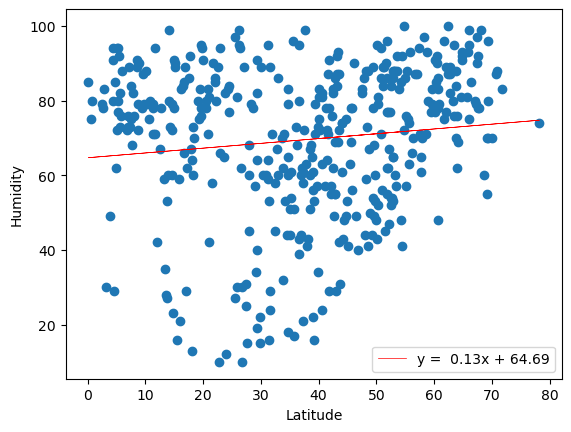

In [17]:
# Northern Hemisphere
northern_humidty = northern_hemi_df['Humidity']

plot_regression_line(northern_latitude, northern_humidty, 'Latitude', 'Humidity')

The r-value is: -0.006623925672607832


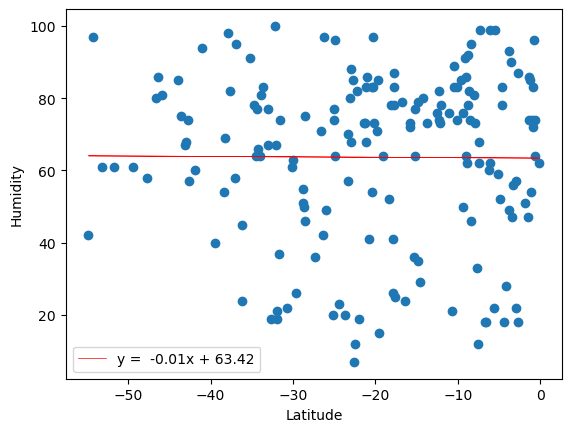

In [18]:
# Southern Hemisphere
southern_humidity = southern_hemi_df['Humidity']

plot_regression_line(southern_latitude, southern_humidity, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** Even though it may looks like there is a gradual positive linear regression between latitude and humidity as we move from the southern to northern hemisphere, there is no real correlation between the two as the scatter plot itself has the cities humidity ranges scattered all over the chart.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08066180986714824


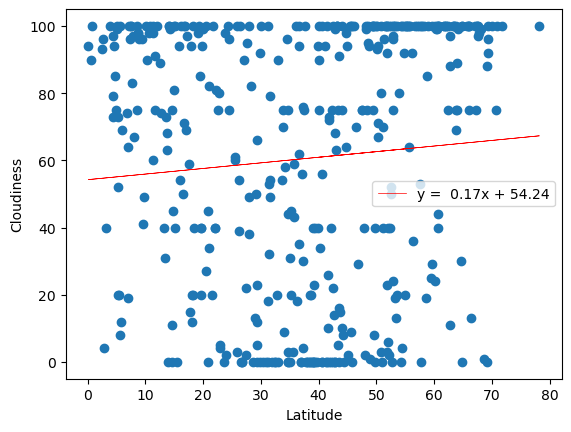

In [19]:
# Northern Hemisphere
northern_cloudiness = northern_hemi_df['Cloudiness']

plot_regression_line(northern_latitude, northern_cloudiness, 'Latitude', 'Cloudiness')

The r-value is: 0.1542509684324854


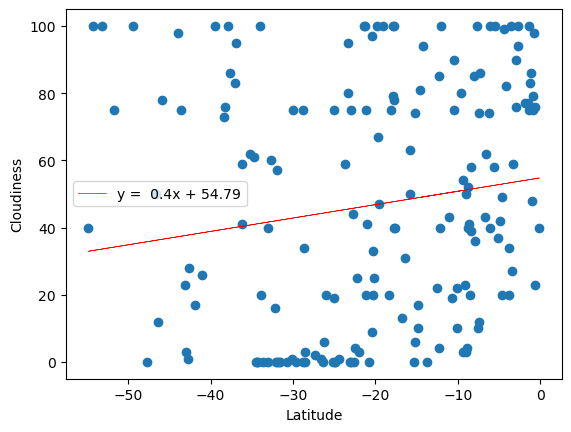

In [20]:
# Southern Hemisphere
southern_cloudiness = southern_hemi_df['Cloudiness']

plot_regression_line(southern_latitude, southern_cloudiness, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** Similarly to the Humidity vs. Latitude Linear Regression Plot, there is no real correlation between the latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08644996196556276


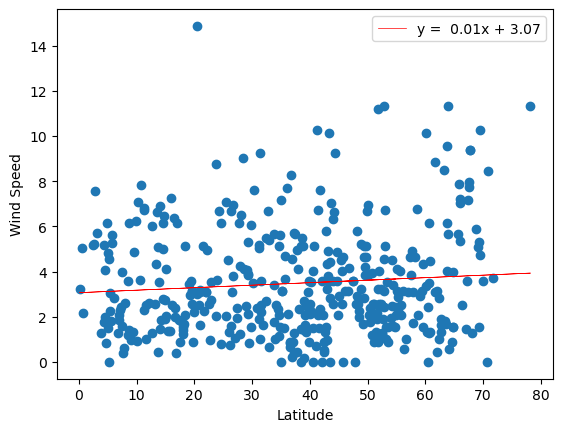

In [21]:
# Northern Hemisphere
northern_windspeed = northern_hemi_df['Wind Speed']

plot_regression_line(northern_latitude, northern_windspeed, 'Latitude', 'Wind Speed')

The r-value is: -0.13279373332372268


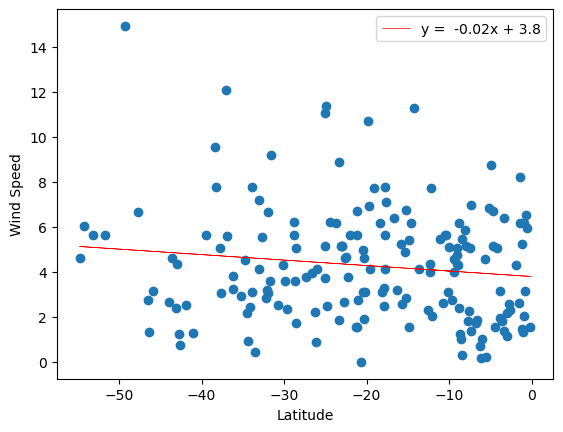

In [22]:
# Southern Hemisphere
southern_windspeed = southern_hemi_df['Wind Speed']

plot_regression_line(southern_latitude, southern_windspeed, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Similarly to the Humidity vs. Latitude or the Cloudiness vs. Latitude Linear Regression plots, there is no real correlation between the latitude and wind speed.